In [1]:
#package
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage import io, color
import numpy as np
import seaborn as sns

In [2]:
# the image 
img = io.imread("C:\\Users\\shubh\\Downloads\\8.jpg")

In [3]:
# import warnings
# warnings.filterwarnings("ignore")

C:\Users\shubh\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\shubh\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
C:\Users\shubh\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
C:\Users\shubh\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


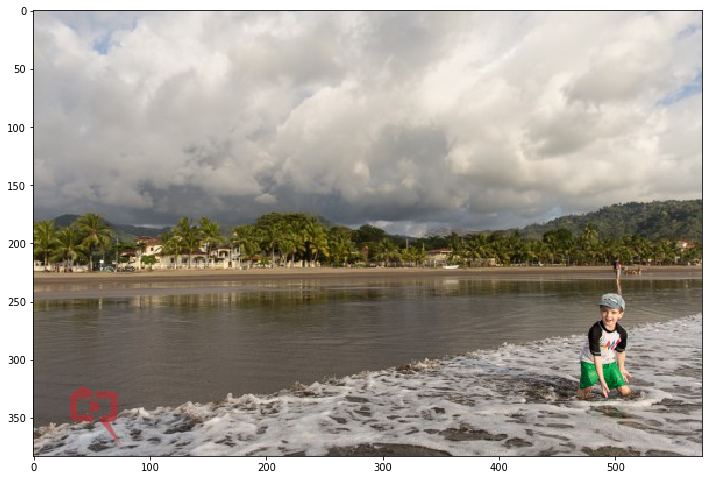

In [4]:
#ploting the image
plt.figure(figsize = (10,10))
io.imshow(img);

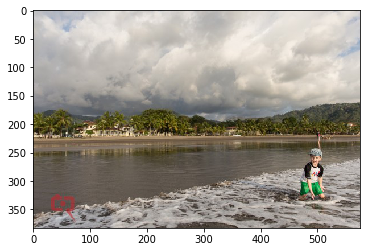

In [5]:
plt.imshow(img);

In [6]:
img.shape

(383, 575, 3)

In [7]:
img = img.reshape((img.shape[0] * img.shape[1], 3))

In [8]:
#sns.set()
#KMean algo is use
wcss=[]
for i in range(1, 11):
    clt = KMeans(n_clusters = i)
    clt.fit(img)
    wcss.append(clt.inertia_)

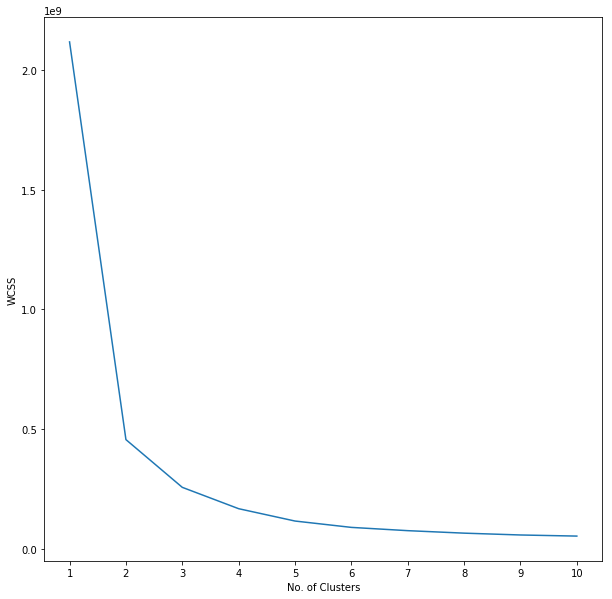

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, 11), wcss);
plt.xticks(range(1, 11))
plt.xlabel("No. of Clusters");
plt.ylabel('WCSS');

In [10]:
numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
hist, b= np.histogram(clt.labels_, bins=numLabels)

In [11]:
#histogram is use
hist = hist.astype("float")
hist/= hist.sum()

In [12]:
bar = np.zeros((50, 300, 3),dtype = "uint8")

In [13]:
startX = 0

In [14]:
#import the cv2 file 
import cv2

In [15]:
for (percent,color)in zip(hist, clt.cluster_centers_):
    endX = startX + (percent * 300)
    cv2.rectangle(bar,(int(startX),0),(int(endX), 50), color.astype("uint8").tolist(), -1)
    startX = endX

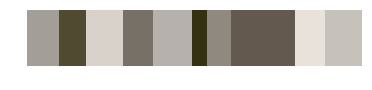

In [16]:
plt.axis("off")
plt.imshow(bar);

In [17]:
#find the hexa code of the colors use is image
a= clt.cluster_centers_

In [18]:
a=np.round(a,0)
a=a.astype('int')
a

array([[163, 158, 153],
       [ 80,  74,  48],
       [216, 210, 203],
       [119, 112, 103],
       [182, 177, 172],
       [ 53,  49,  19],
       [144, 137, 129],
       [ 99,  90,  78],
       [232, 226, 219],
       [199, 194, 188]])

In [19]:
#make the rgb formet like rrggbb
for i in range (4):
    s = "rgb("
    for j in range(3):
        s=s+str(a[i][j])+','
    s = s+')'
    print(s)
        
    

rgb(163,158,153,)
rgb(80,74,48,)
rgb(216,210,203,)
rgb(119,112,103,)


In [20]:
hexa = []
temp = ""
for i in range(4):
    temp = ''
    for j in range(3):
        temp = temp+hex(a[i][j])
    hexa.append(temp)

In [21]:
hexa


['0xa30x9e0x99', '0x500x4a0x30', '0xd80xd20xcb', '0x770x700x67']

In [22]:
import re
hexa_new= ['#'+re.sub('0x','',i)for i in hexa]
hexa_new

['#a39e99', '#504a30', '#d8d2cb', '#777067']

In [23]:
#hexa code genration
for i in hexa_new:
    print('hex(rrggbb) = '+i)

hex(rrggbb) = #a39e99
hex(rrggbb) = #504a30
hex(rrggbb) = #d8d2cb
hex(rrggbb) = #777067
